# Julia sets (live coding version)

This is the unedited live lecture notebook from Lecture 24.

In [50]:
def f(z):
    return z*z - 1

In [4]:
def orbit(func,a,n):
    "Compute the first `n` terms in the orbit of `a` under function `func`"
    L = [a]
    for _ in range(n-1):
        a = func(a)
        L.append(a)
    return L

In [5]:
orbit(f,1,10) # bounded

[1, 0, -1, 0, -1, 0, -1, 0, -1, 0]

In [6]:
orbit(f,2,10) # unbounded

[2,
 3,
 8,
 63,
 3968,
 15745023,
 247905749270528,
 61457260521381894004129398783,
 3776994870793005510047522464634252677140721938309041881088,
 14265690253996672387291309349232388828298289458234016200317876247121873778287073518355813134107244701354409532063743]

In [7]:
orbit(f,1.9,10) # unbounded

[1.9,
 2.61,
 5.812099999999999,
 32.78050640999999,
 1073.5616004960502,
 1152533.510059641,
 1328333491809.3965,
 1.764469865462544e+24,
 3.1133539061254084e+48,
 9.692972544786338e+96]

In [10]:
orbit(f,1.25,30) # bounded??

[1.25,
 0.5625,
 -0.68359375,
 -0.5326995849609375,
 -0.7162311521824449,
 -0.4870129366434074,
 -0.7628183995419644,
 -0.418108089320236,
 -0.8251856256449815,
 -0.31906868322890036,
 -0.8981951753825757,
 -0.19324542691946411,
 -0.962656204974714,
 -0.07329303102368134,
 -0.9946281316033617,
 -0.010714879823205736,
 -0.9998851913503742,
 -0.00022960411822547933,
 -0.9999999472819489,
 -1.0543609951785271e-07,
 -0.9999999999999889,
 -2.220446049250313e-14,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0]

## Complex numbers in python

In [11]:
# In mathematics the square root of -1 is called i
1j

1j

In [12]:
1j*1j

(-1+0j)

In [14]:
z = 4-5j

In [15]:
type(z)

complex

## Grid of complex numbers

In [16]:
import numpy as np

In [41]:
size = 1000

# All complex numbers x+y*i where |x| <= 2.5 and |y| <= 2.5
# Make a 2D array whose values give a rectangular grid of points in that region
xvals = np.linspace(-2.5,2.5,size) # row
yvals = np.linspace(-2.5,2.5,size) # row

In [42]:
# [[ -2.5+2.5j, ..., 2.5+2.5j], ... [-2.5-2.5j, ..., 2.5-2.5j] ]
# row            col
zz = xvals + 1j * yvals[::-1].reshape((size,1))

In [44]:
zz.shape

(1000, 1000)

Let's classify the orbits of the points in zz

In [29]:
def is_unbounded(a):
    """
    Return True if the orbit of `a` under `f` can be seen to be unbounded
    by examining the first 1000 points in it.  Otherwise, return False.
    """
    for _ in range(1000):
        if abs(a) >= 2:
            return True
        a = f(a)
    
    return False

In [30]:
is_unbounded(2)

True

In [31]:
is_unbounded(1.9)

True

In [32]:
is_unbounded(1.25)

False

In [45]:
# Where I'll store the orbit classification results
imgdata = np.zeros_like(zz,dtype="uint8")
# black = 0, white = 255

In [46]:
imgdata.shape

(1000, 1000)

In [47]:
for i in range(zz.shape[0]):
    for j in range(zz.shape[1]):
        if is_unbounded(zz[i,j]):
            # orbit is not bounded, so put a white pixel at that point
            imgdata[i,j] = 255

In [48]:
import PIL.Image

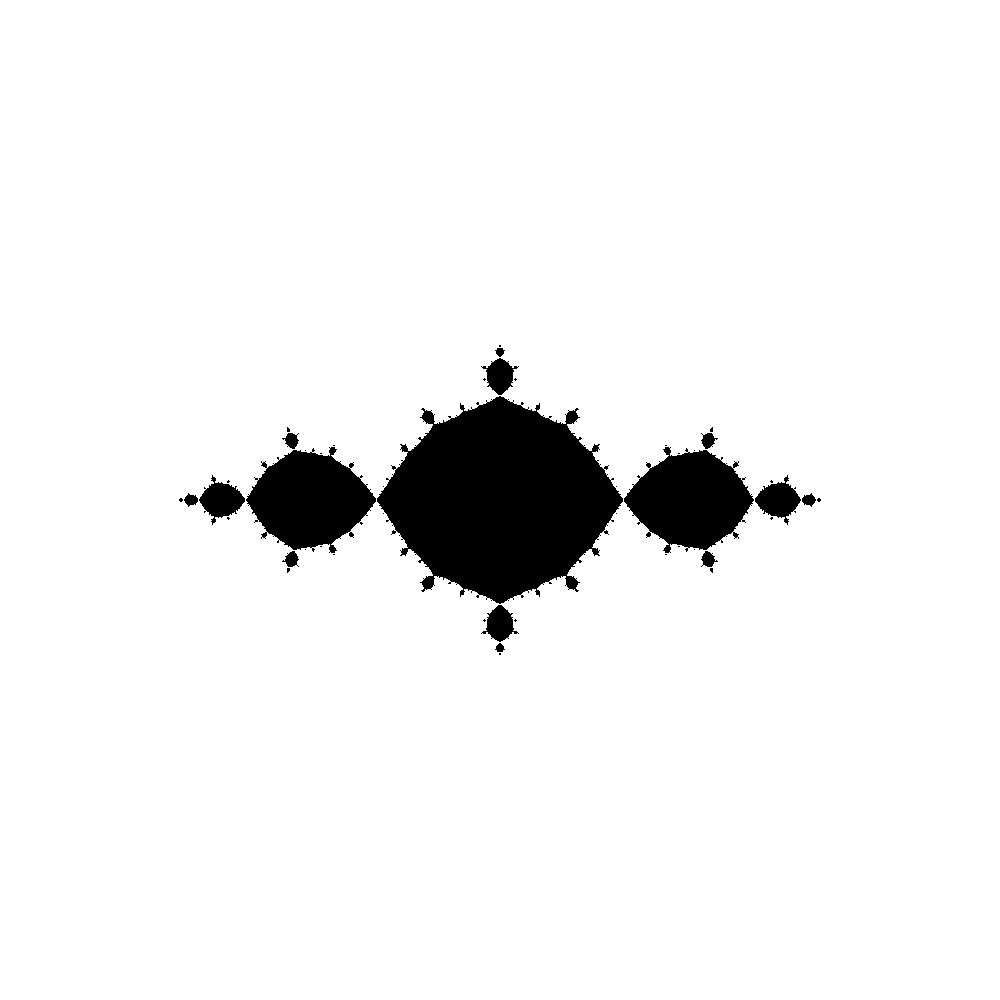

In [49]:
PIL.Image.fromarray(imgdata)

In [52]:
f(zz)

array([[-1.        -12.5j       , -1.02499997-12.47497497j,
        -1.04994985-12.44994995j, ..., -1.04994985+12.44994995j,
        -1.02499997+12.47497497j, -1.        +12.5j       ],
       [-0.97500003-12.47497497j, -1.        -12.45000005j,
        -1.02494987-12.42502513j, ..., -1.02494987+12.42502513j,
        -1.        +12.45000005j, -0.97500003+12.47497497j],
       [-0.95005015-12.44994995j, -0.97505013-12.42502513j,
        -1.        -12.4001003j , ..., -1.        +12.4001003j ,
        -0.97505013+12.42502513j, -0.95005015+12.44994995j],
       ...,
       [-0.95005015+12.44994995j, -0.97505013+12.42502513j,
        -1.        +12.4001003j , ..., -1.        -12.4001003j ,
        -0.97505013-12.42502513j, -0.95005015-12.44994995j],
       [-0.97500003+12.47497497j, -1.        +12.45000005j,
        -1.02494987+12.42502513j, ..., -1.02494987-12.42502513j,
        -1.        -12.45000005j, -0.97500003-12.47497497j],
       [-1.        +12.5j       , -1.02499997+12.47497497j

In [53]:
iterates = np.copy(zz)

C:\Users\ddumas\AppData\Local\Temp\ipykernel_15808\3167947636.py:2: RuntimeWarning: overflow encountered in multiply
  return z*z - 1
C:\Users\ddumas\AppData\Local\Temp\ipykernel_15808\3167947636.py:2: RuntimeWarning: invalid value encountered in multiply
  return z*z - 1


In [57]:
np.isnan(iterates) # is_unbounded for each point in the grid

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

C:\Users\ddumas\AppData\Local\Temp\ipykernel_15808\3167947636.py:2: RuntimeWarning: overflow encountered in multiply
  return z*z - 1
C:\Users\ddumas\AppData\Local\Temp\ipykernel_15808\3167947636.py:2: RuntimeWarning: invalid value encountered in multiply
  return z*z - 1


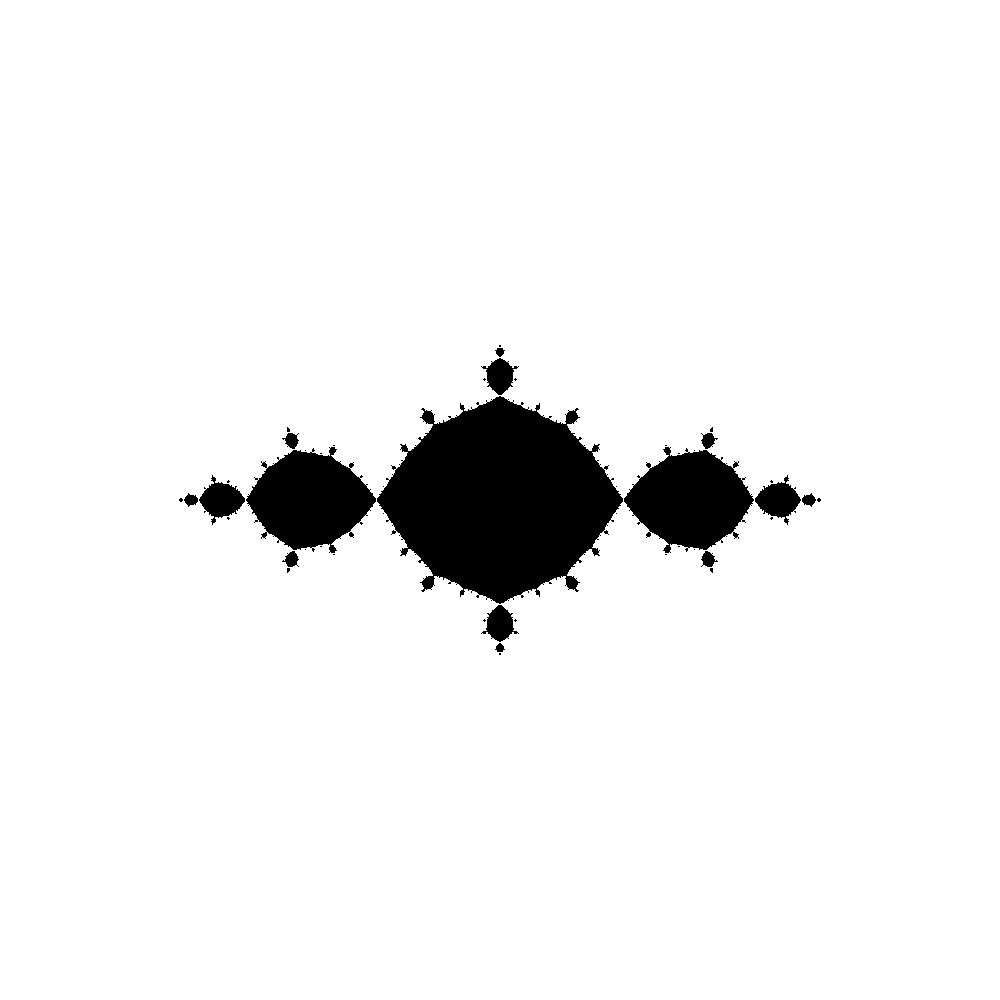

In [61]:
iterates = np.copy(zz)
for _ in range(1000):
    iterates = f(iterates)
PIL.Image.fromarray(255*np.isnan(iterates).astype("uint8"))

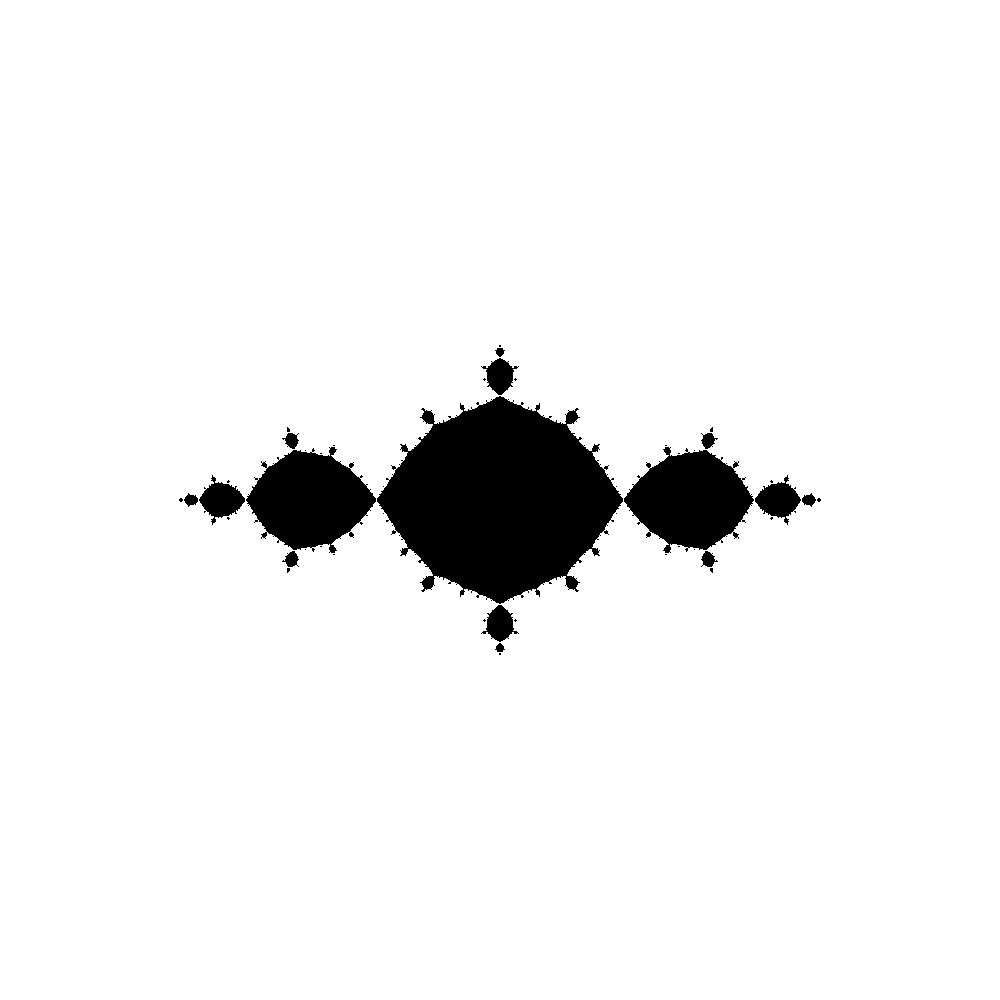

In [63]:
iterates = np.copy(zz)
proceed = np.ones_like(iterates,dtype="bool")  # Grid of True
for _ in range(1000):
    iterates[proceed] = f(iterates[proceed])  # Apply f to each pixel where we are supposed to proceed
    proceed = np.abs(iterates) < 2  # In future iterations, only continue on the pixels where abs < 2

PIL.Image.fromarray(255*(1 - proceed.astype("uint8")))